In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import h5py
import os
import keras
import numpy as np
# from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, Dense, Input, add, Activation, GlobalAveragePooling2D
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.models import Model
from keras import optimizers
from keras import regularizers

from keras.utils import np_utils, conv_utils
from keras.models import Model
from keras.layers import Flatten, Dense, Input 
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.


In [2]:
import json
import cv2

with open(r'./scene_train_annotations_20170904.json', 'r') as f:
  data = json.load(f)
# label=json.loads()
with open(r'./scene_validation_annotations_20170908.json', 'r') as f1:
  val = json.load(f1)

In [3]:
name=[]
label=[]
for i in range(0,len(data)):
    name.append(data[i]['image_id'])
    label.append(data[i]['label_id'])

In [4]:
name1=[]
label1=[]
for i in range(0,len(val)):
    name1.append(val[i]['image_id'])
    label1.append(val[i]['label_id'])

In [5]:
import numpy as np
label=np.array(label)
label1=np.array(label1)

In [6]:
label=label.astype(int)
label1=label1.astype(int)

In [7]:
label

array([66, 61, 64, ..., 44, 48, 67])

In [ ]:
# import os
# name=[]
# for filename in os.listdir(r"./scene_train_images_20170904/"):
# #     print ( filename) 
#     name.append(filename)

In [8]:
# y=[]
# for s in name:
#   for n in range(0,len(data)):
#     if s==data[n]['image_id']:
#         y.append(data[n]['label_id'])

In [9]:
name

['79f993ae0858ae238b22968c5934d1ddba585ae4.jpg',
 'e963208fe9e90df0c385f7367bcdb6d0d5d0b165.jpg',
 '02df5ecbf7c749ccc9d833f129bbd5d9837940ce.jpg',
 '5620eb385b7567fb087813cf5233b5ceecdeeca3.jpg',
 'f8b4d42001a562fc63b9b39c02531661c0e236ca.jpg',
 '57e7eb438670a4519041dab1482f2594a92f8a09.jpg',
 'addb2ef7e4aa1a160093e32ceec19bf900c05d2e.jpg',
 '84a5b79a7f8fe3ddb43355eaf010a3a432e457b4.jpg',
 '48f690ba20db3e6a0a0f7ab5b59480f7558b18fa.jpg',
 '3c53b82532f132da2727fad84ade044f364a1dba.jpg',
 'bf03540d8cc31872f16fc5e1bd9013b0427d5faf.jpg',
 '7d2d26c3e4b3fc69977cb6f7ad945a866202c7b3.jpg',
 '4855a86d8fdf023b7fa7fc2d081173b92d8893eb.jpg',
 '4e7c1bbc1ea959eb1b437791b454bf281e63ba17.jpg',
 'ca601c918a898d88942041a1ac6d21e40e026661.jpg',
 '77230b347636cb38e3910721bd1f879ffe872599.jpg',
 '207077886574e143516b4911121b206041393d27.jpg',
 '4df7c3e21677542c31903a84e7d381707cd48472.jpg',
 'efeecac57fb0e0c456da16d575c7611468c9dd12.jpg',
 'e8081a705713735e25742c7a242786678fd624cc.jpg',
 '6118d6d54f7d3d6527

In [11]:
import cv2
train_set_x=[]
for n in name:
    img1 = cv2.imread(r"./scene_train_images_20170904/%s"%n)   #读取图片，第二个参数表示以灰度图像读入 
    NewImg = cv2.resize(img1, (128,128))  
    train_set_x.append(NewImg)               #将list添加到已有的list中



In [14]:
len(train_set_x)

53879

In [15]:
val_set_x=[]
for n in name1:
    img2 = cv2.imread(r"./scene_validation_images_20170908/%s"%n)   #读取图片，第二个参数表示以灰度图像读入 
    NewImg = cv2.resize(img2, (128,128))  
    val_set_x.append(NewImg)               #将list添加到已有的list中

In [16]:
len(val_set_x)

7120

In [39]:
img1 = cv2.imread(r"./scene_train_images_20170904/6123b8647d7fed6ccb66fd8bf95f7724172591ea.jpg") 

In [40]:
img1.shape

(517, 690, 3)

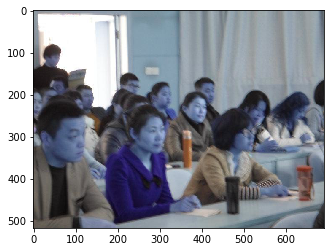

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img1) 


In [48]:
NewImg = cv2.resize(img1, (128,128))  

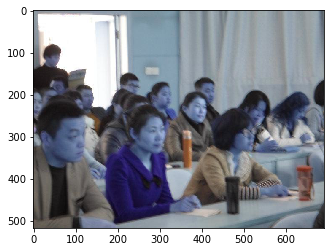

In [49]:
plt.imshow(img1) 

In [17]:

depth              = 16
wide               = 8
num_classes        = 80
img_rows, img_cols = 128, 128
img_channels       = 3
batch_size         = 128
epochs             = 5
iterations         = 391
weight_decay       = 0.0005
log_filepath       = r'./ai_w_resnet/'

In [18]:
def scheduler(epoch):
    if epoch <= 60:
        return 0.1
    if epoch <= 120:
        return 0.02
    if epoch <= 160:
        return 0.004
    return 0.0008

In [19]:
def color_preprocessing(x_train,x_test):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train[:,:,:,0] = (x_train[:,:,:,0] - np.mean(x_train[:,:,:,0])) / np.std(x_train[:,:,:,0])
    x_train[:,:,:,1] = (x_train[:,:,:,1] - np.mean(x_train[:,:,:,1])) / np.std(x_train[:,:,:,1])
    x_train[:,:,:,2] = (x_train[:,:,:,2] - np.mean(x_train[:,:,:,2])) / np.std(x_train[:,:,:,2])
    x_test[:,:,:,0] = (x_test[:,:,:,0] - np.mean(x_test[:,:,:,0])) / np.std(x_test[:,:,:,0])
    x_test[:,:,:,1] = (x_test[:,:,:,1] - np.mean(x_test[:,:,:,1])) / np.std(x_test[:,:,:,1])
    x_test[:,:,:,2] = (x_test[:,:,:,2] - np.mean(x_test[:,:,:,2])) / np.std(x_test[:,:,:,2])

    return x_train, x_test

def wide_residual_network(img_input,classes_num,depth,k):

    print('Wide-Resnet %dx%d' %(depth, k))
    n_filters  = [16, 16*k, 32*k, 64*k]
    n_stack    = (depth - 4) / 6
    in_filters = 16

    def conv3x3(x,filters):
    	return Conv2D(filters=filters, kernel_size=(3,3), strides=(1,1), padding='same',
    	kernel_initializer=he_normal(),
        kernel_regularizer=regularizers.l2(weight_decay))(x)

    def residual_block(x,out_filters,increase_filter=False):
        if increase_filter:
            first_stride = (2,2)
        else:
            first_stride = (1,1)
        pre_bn   = BatchNormalization()(x)
        pre_relu = Activation('relu')(pre_bn)
        conv_1 = Conv2D(out_filters,kernel_size=(3,3),strides=first_stride,padding='same',kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(pre_relu)
        bn_1   = BatchNormalization()(conv_1)
        relu1  = Activation('relu')(bn_1)
        conv_2 = Conv2D(out_filters, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(relu1)
        if increase_filter or in_filters != out_filters:
            projection = Conv2D(out_filters,kernel_size=(1,1),strides=first_stride,padding='same',kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(x)
            block = add([conv_2, projection])
        else:
            block = add([conv_2,x])
        return block

    def wide_residual_layer(x,out_filters,increase_filter=False):
    	x = residual_block(x,out_filters,increase_filter)
    	in_filters = out_filters
    	for _ in range(1,int(n_stack)):
    		x = residual_block(x,out_filters)
    	return x


    x = conv3x3(img_input,n_filters[0])
    x = wide_residual_layer(x,n_filters[1])
    x = wide_residual_layer(x,n_filters[2],increase_filter=True)
    x = wide_residual_layer(x,n_filters[3],increase_filter=True)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(classes_num,activation='softmax',kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(x)
    return x


In [21]:
    x_train=np.array(train_set_x)
    x_test=np.array(val_set_x)
    y_train=label
    y_test=label1
    
    # color preprocessing
    x_train, x_test = color_preprocessing(x_train, x_test)

MemoryError: 

In [22]:
    # build network
    img_input = Input(shape=(img_rows,img_cols,img_channels))
    output = wide_residual_network(img_input,num_classes,depth,wide)
    resnet = Model(img_input, output)
    print(resnet.summary())
    # set optimizer
#     sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    adam = optimizers.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    los= top_k_categorical_accuracy(y_true, y_pred, k=3)
    resnet.compile(loss=los, optimizer=adam, metrics=['accuracy'])
    resnet.load_weights(r'my_model_weights.h5')
    # set callback
    tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
    change_lr = LearningRateScheduler(scheduler)
    cbks = [change_lr,tb_cb]

    # set data augmentation
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(horizontal_flip=True,
            width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)

    datagen.fit(x_train)



Wide-Resnet 16x8
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 128, 128, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 128, 128, 16)  448         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 128, 128, 16)  64          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 128, 128, 16)  0           batch_normalization_1[0][0]      
__________________________________________________________________________

AttributeError: module 'keras.optimizers' has no attribute 'keras'

In [ ]:
    # start training
    resnet.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                        steps_per_epoch=iterations,
                        epochs=epochs,
                        callbacks=cbks,
                        validation_data=(x_test, y_test))
    resnet.save('resnet1.h5')